In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [20, 10]

# Import Data

In [31]:
my_path ='D:\Gradution project\datasets\Clustering and calibration transfer dataset\Calibration Set\Absorbance form\\'

In [37]:
my_path2 = 'D:\Gradution project\datasets\Clustering and calibration transfer dataset\Calibration Set\Reflectance form\\'

df_52 = pd.read_csv(my_path2+'scanner_52.csv')
df_171 = pd.read_csv(my_path2+'scanner171.csv')

for i in range(30):
    df_171.iloc[i] = 2-np.log10(df_171.iloc[i])
    df_52.iloc[i] = 2-np.log10(df_52.iloc[i])

In [38]:
df_122 = pd.read_csv(my_path+'\\122_spectrum.csv')
df_169 = pd.read_csv(my_path+'\\169_spectrum.csv')
df_190 = pd.read_csv(my_path+'\\190_spectrum.csv')
df_10119 = pd.read_csv(my_path+'\\10119_spectrum.csv')
df_10121 = pd.read_csv(my_path+'\\10121_spectrum.csv')
df_211100001 = pd.read_csv(my_path+'\\211100001_spectrum.csv')

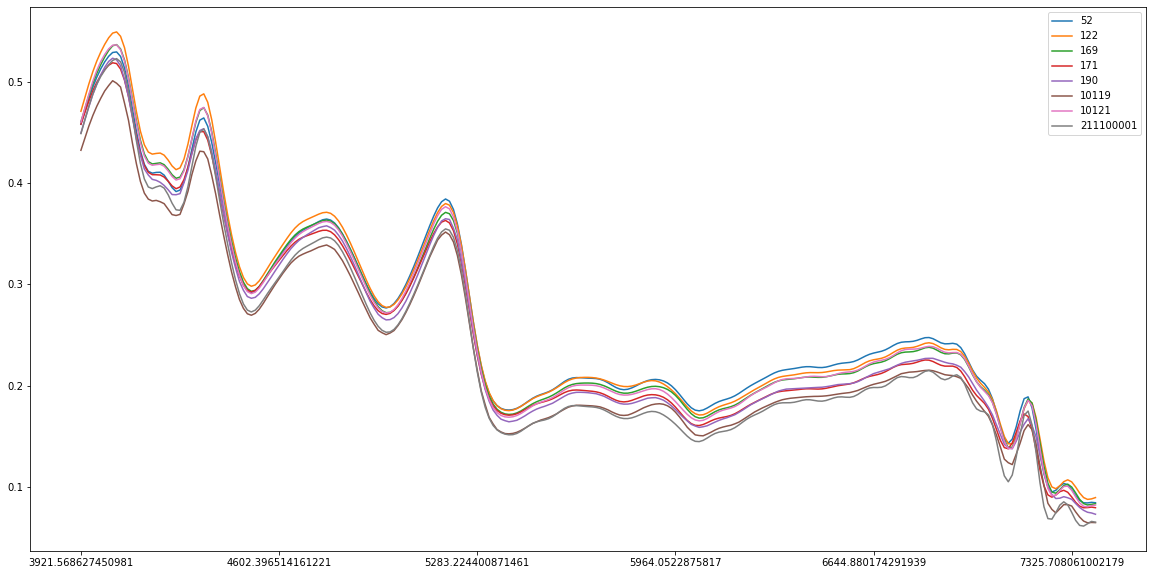

In [39]:
index = 22 # the sample number from 0 to 29
df_52.iloc[index].plot(label='52')
df_122.iloc[index].plot(label='122')
df_169.iloc[index].plot(label='169')
df_171.iloc[index].plot(label='171')
df_190.iloc[index].plot(label='190')
df_10119.iloc[index].plot(label='10119')
df_10121.iloc[index].plot(label='10121')
df_211100001.iloc[index].plot(label='211100001')

plt.legend() #give each device a different color

# 1st Method Concat

In [40]:
np_52 = df_52.to_numpy().ravel().reshape(1,-1)
np_122 = df_122.to_numpy().ravel().reshape(1,-1)
np_169 = df_169.to_numpy().ravel().reshape(1,-1)
np_171 = df_171.to_numpy().ravel().reshape(1,-1)
np_190 = df_190.to_numpy().ravel().reshape(1,-1)
np_10119 = df_10119.to_numpy().ravel().reshape(1,-1)
np_10121 = df_10121.to_numpy().ravel().reshape(1,-1)
np_211100001 = df_211100001.to_numpy().ravel().reshape(1,-1)
np_122.shape

(1, 7710)

In [41]:
scanners = np.concatenate((np_52,np_122,np_169,np_171,np_190,np_10119,np_10121,np_211100001),axis=0)
scanners = pd.DataFrame(scanners)
scanners

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
0,0.559955,0.572687,0.584987,0.596320,0.606629,0.616297,0.625783,0.635000,0.642807,0.646931,...,0.273070,0.272091,0.265621,0.253584,0.238098,0.221981,0.207370,0.195158,0.185211,0.176979
1,0.605436,0.618485,0.631060,0.642784,0.653728,0.664293,0.674792,0.684901,0.693234,0.697368,...,0.282114,0.281956,0.279424,0.272137,0.259899,0.244353,0.227844,0.212403,0.199296,0.189091
2,0.597186,0.610237,0.622888,0.634622,0.645420,0.655683,0.665835,0.675689,0.683840,0.687832,...,0.276006,0.276421,0.273689,0.265713,0.252902,0.237447,0.222047,0.208477,0.197356,0.188568
3,0.584868,0.597144,0.609149,0.620129,0.629696,0.638196,0.646030,0.653144,0.658575,0.660441,...,0.285048,0.281897,0.274072,0.261831,0.247191,0.232941,0.220766,0.211174,0.203826,0.198078
4,0.545156,0.558291,0.571014,0.582794,0.593652,0.603977,0.614025,0.623373,0.630552,0.633208,...,0.274160,0.270618,0.263508,0.255645,0.243482,0.231255,0.218770,0.207300,0.197146,0.188414
5,0.538285,0.551435,0.563765,0.574704,0.584380,0.593473,0.602632,0.611722,0.619269,0.622511,...,0.281694,0.281530,0.276952,0.269903,0.255417,0.239959,0.222968,0.208108,0.195057,0.184970
6,0.580272,0.593573,0.606573,0.618519,0.629287,0.639310,0.649070,0.658462,0.666269,0.670146,...,0.277704,0.278051,0.274055,0.264300,0.250101,0.234205,0.219150,0.206310,0.195845,0.187317
7,0.580496,0.594866,0.608924,0.621468,0.631998,0.641020,0.649673,0.658775,0.667796,0.674338,...,0.265112,0.265010,0.258211,0.245395,0.229544,0.213800,0.199929,0.188093,0.177621,0.168069


In [42]:
df_10121.head()

,3921.568627450981,3935.185185185186,3948.801742919391,3962.418300653595,3976.0348583878,3989.651416122005,4003.267973856209,4016.884531590415,4030.501089324619,4044.117647058824,...,7284.858387799564,7298.474945533769,7312.091503267973,7325.708061002179,7339.324618736383,7352.941176470587,7366.557734204793,7380.174291938998,7393.790849673202,7407.407407407407
0,0.580272,0.593573,0.606573,0.618519,0.629287,0.639310,0.649070,0.658462,0.666269,0.670146,...,0.145578,0.147826,0.146048,0.139566,0.130183,0.120655,0.113053,0.107911,0.104332,0.100778
1,0.466040,0.475049,0.483696,0.491897,0.500247,0.509810,0.521574,0.535702,0.550842,0.563892,...,0.192767,0.196093,0.194471,0.187000,0.175896,0.164525,0.155385,0.149159,0.144915,0.141049
2,0.653831,0.668522,0.683040,0.696354,0.707963,0.717884,0.726212,0.732653,0.736198,0.735253,...,0.181416,0.180411,0.177252,0.171574,0.164211,0.156485,0.149428,0.143381,0.138083,0.133085
3,0.694034,0.708878,0.723512,0.736933,0.748715,0.758957,0.767799,0.774915,0.779192,0.778890,...,0.201618,0.199563,0.195732,0.189475,0.181148,0.171694,0.162101,0.153041,0.144822,0.137579
4,0.542432,0.556761,0.570799,0.583599,0.594724,0.604167,0.611925,0.617589,0.620126,0.618072,...,0.131697,0.131459,0.129308,0.125075,0.119614,0.114156,0.109607,0.106171,0.103431,0.100730


<AxesSubplot:>

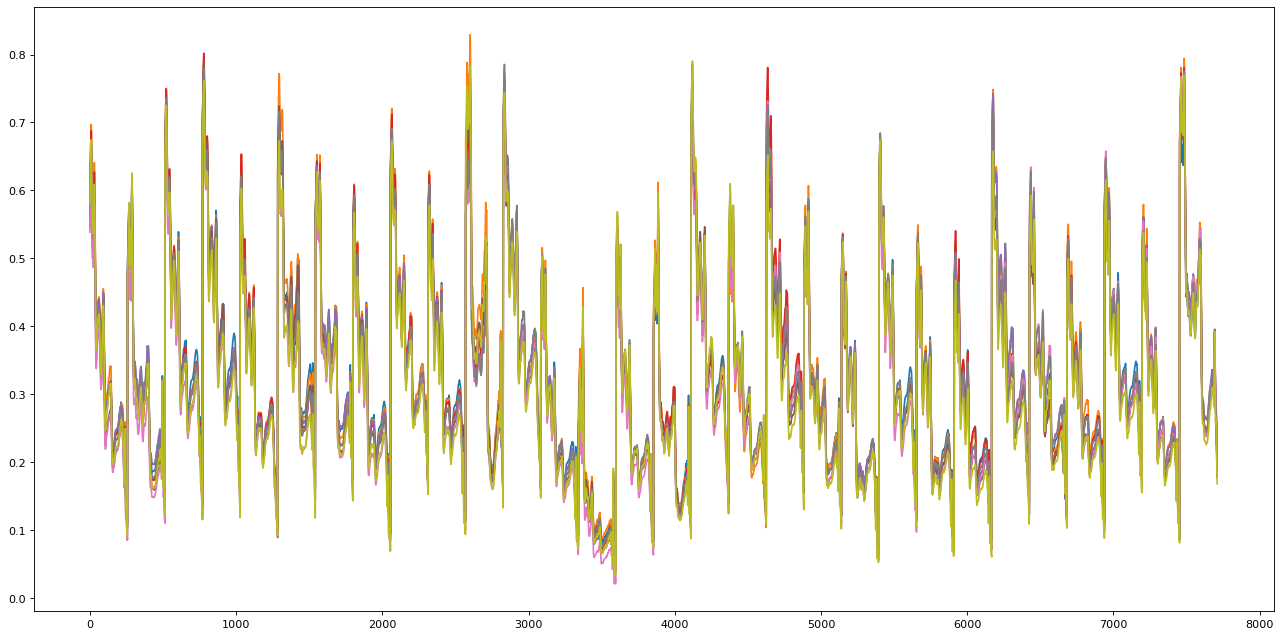

In [45]:
plt.figure(figsize=(20, 10), dpi=80)
scanners.iloc[0].plot()
scanners.iloc[1].plot()
scanners.iloc[3].plot()
scanners.iloc[2].plot()
scanners.iloc[3].plot()
scanners.iloc[4].plot()
scanners.iloc[5].plot()
scanners.iloc[6].plot()
scanners.iloc[7].plot()

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


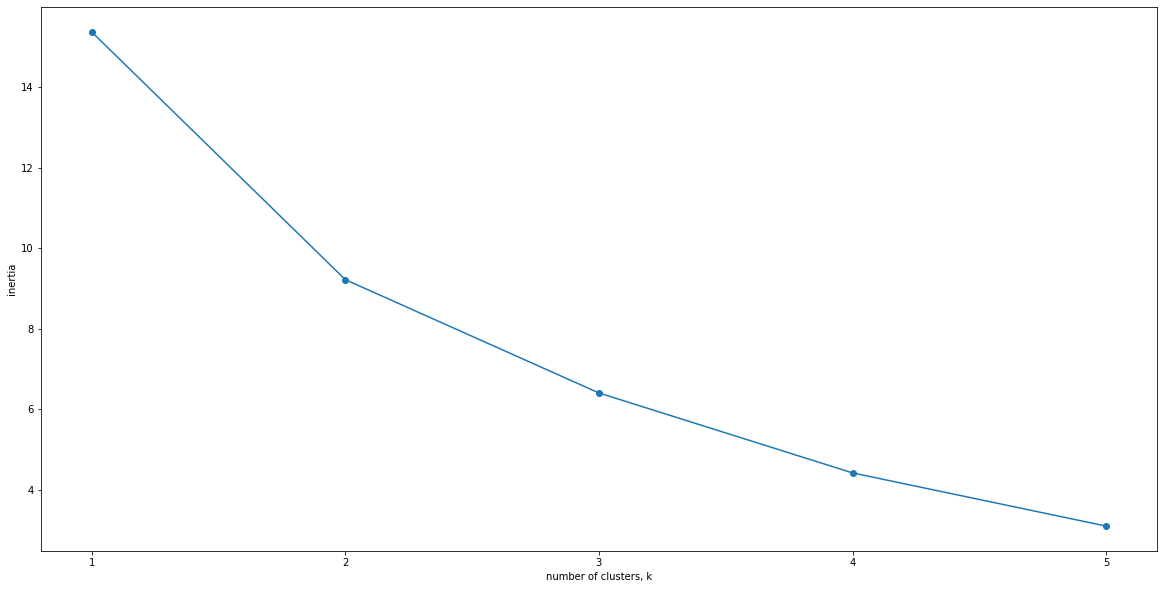

<Figure size 640x480 with 0 Axes>

In [46]:
inertia = []
clusters = range(1, 6)
for i in clusters:
    model = KMeans(i)
    model.fit (scanners)
    model.predict(scanners)
    inertia.append(model.inertia_)
# Plot clusters vs inertias
plt.plot(clusters, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.figure(figsize=(8, 6), dpi=80)
plt.show()
    
    

In [51]:
model = KMeans(4)

In [52]:
model.fit (scanners)

KMeans(n_clusters=4)

In [53]:
model.predict(scanners)

array([3, 2, 3, 3, 0, 1, 3, 0])

In [54]:
model.inertia_

4.414303222538676

# 2nd Method per sample

In [56]:
np_52 = df_52.to_numpy()
np_122 = df_122.to_numpy()
np_169 = df_169.to_numpy()
np_171 = df_171.to_numpy()
np_190 = df_190.to_numpy()
np_10119 = df_10119.to_numpy()
np_10121 = df_10121.to_numpy()
np_211100001 = df_211100001.to_numpy()


In [57]:
results=[]
for i in range (30):
    sample =[]
    sample.append(np_52[i])
    sample.append(np_122[i])
    sample.append(np_169[i])
    sample.append(np_171[i])
    sample.append(np_190[i])
    sample.append(np_10119[i])
    sample.append(np_10121[i])
    sample.append(np_211100001[i])
    
    model = KMeans(3)
    model.fit (sample)
    results.append(list(model.predict(sample)))
    
results = np.array(results)    

In [58]:
print(results)
# results.shape

[[0 2 2 2 1 1 0 0]
 [1 2 2 1 2 0 2 2]
 [1 1 1 1 0 2 1 0]
 [0 2 2 2 2 1 2 1]
 [0 1 1 0 0 2 0 2]
 [2 2 0 0 2 1 0 1]
 [1 1 0 1 2 2 0 2]
 [1 1 1 1 0 2 0 2]
 [0 1 1 0 2 2 0 2]
 [0 0 0 2 2 1 2 1]
 [1 0 1 2 1 2 2 1]
 [0 0 0 0 1 0 2 1]
 [1 1 0 1 0 2 1 0]
 [0 0 2 2 0 1 2 2]
 [2 2 2 2 2 1 0 0]
 [1 2 2 1 0 0 0 0]
 [2 2 1 2 0 1 2 0]
 [0 1 0 0 0 0 2 2]
 [0 2 2 0 1 0 0 1]
 [2 0 2 2 1 1 2 1]
 [0 0 0 2 1 1 0 1]
 [2 1 1 1 1 0 2 1]
 [0 0 0 2 2 1 0 1]
 [1 1 1 0 0 0 0 2]
 [1 2 1 2 1 1 1 0]
 [2 2 0 0 0 1 1 0]
 [1 2 1 0 0 0 1 0]
 [1 1 2 2 2 2 1 0]
 [1 1 2 1 0 2 0 0]
 [2 1 1 1 2 1 1 0]]


In [59]:
scores = np.zeros((8,8))
for i in range (30):
    for j in range (8):
        for k in range (8):
            if k==j:
                scores [j,k]=np.NaN
                
            elif results[i,j] == results[i,k]:
                scores[j,k]+=1

In [61]:
names = ["52","122","169","171","190","10119","10121","211100001"]
df_scores = pd.DataFrame (scores ,index=names, columns=names)
display(df_scores)
# df_scores.describe()

,52,122,169,171,190,10119,10121,211100001
52,NaN,16.0,13.0,15.0,8.0,4.0,14.0,2.0
122,16.0,NaN,17.0,13.0,6.0,2.0,9.0,2.0
169,13.0,17.0,NaN,14.0,10.0,7.0,12.0,6.0
171,15.0,13.0,14.0,NaN,11.0,8.0,14.0,4.0
190,8.0,6.0,10.0,11.0,NaN,11.0,9.0,16.0
10119,4.0,2.0,7.0,8.0,11.0,NaN,7.0,12.0
10121,14.0,9.0,12.0,14.0,9.0,7.0,NaN,7.0
211100001,2.0,2.0,6.0,4.0,16.0,12.0,7.0,NaN


[Text(0.5, 0, '52'),
 Text(1.5, 0, '122'),
 Text(2.5, 0, '169'),
 Text(3.5, 0, '171'),
 Text(4.5, 0, '190'),
 Text(5.5, 0, '10119'),
 Text(6.5, 0, '10121'),
 Text(7.5, 0, '211100001')]

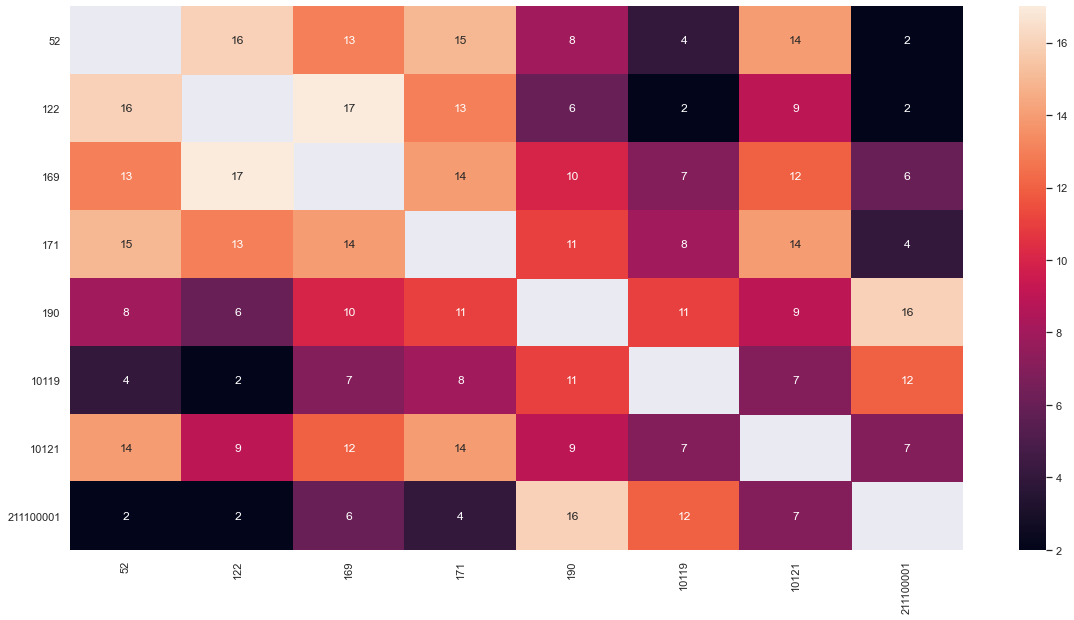

In [62]:
import seaborn as sns
sns.set_theme()
ax = sns.heatmap(df_scores,annot=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation = -0)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### remove low scores

[Text(0.5, 0, '52'),
 Text(1.5, 0, '122'),
 Text(2.5, 0, '169'),
 Text(3.5, 0, '171'),
 Text(4.5, 0, '190'),
 Text(5.5, 0, '10119'),
 Text(6.5, 0, '10121'),
 Text(7.5, 0, '211100001')]

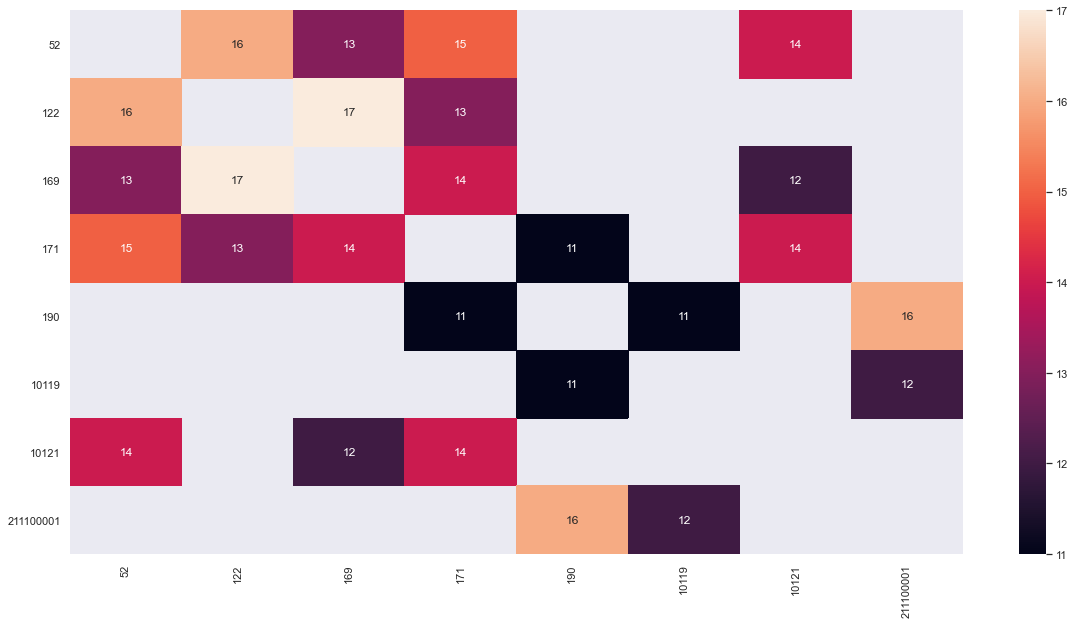

In [63]:
mod_df_scores = df_scores.replace(to_replace=range(0,11),value= np.NaN)
sns.set_theme()
# ax = sns.heatmap(mod_df_scores,annot=True,vmax=13)
ax = sns.heatmap(mod_df_scores,annot=True)
ax.set_yticklabels(ax.get_yticklabels(),rotation = -0)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
